In [1]:
import pandas as pd
df = pd.read_csv("personality_dataset.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [2]:
print(df.isnull().sum())
print(df.duplicated().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64
388


In [3]:
#cleaning duplicated values
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [4]:
#checking for inconsistencies
inconsistency_1 = df[
    (df['Time_spent_Alone'] >= 24) &
    (df['Social_event_attendance'] > 0)
]
print(f"Number of inconsistent rows: {len(inconsistency_1)}")

Number of inconsistent rows: 0


In [5]:
#number of outliers
numeric_features = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

total_outliers = 0

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    total_outliers += len(outliers)

print("Total number of outliers:", total_outliers)


Total number of outliers: 0


In [6]:
#filling missing values (for numeric values)
df["Time_spent_Alone"] = df["Time_spent_Alone"].fillna(df["Time_spent_Alone"].median())
df["Social_event_attendance"] = df["Social_event_attendance"].fillna(df["Social_event_attendance"].median())
df["Going_outside"] = df["Going_outside"].fillna(df["Going_outside"].median())
df["Friends_circle_size"] = df["Friends_circle_size"].fillna(df["Friends_circle_size"].median())
df["Post_frequency"] = df["Post_frequency"].fillna(df["Post_frequency"].median())

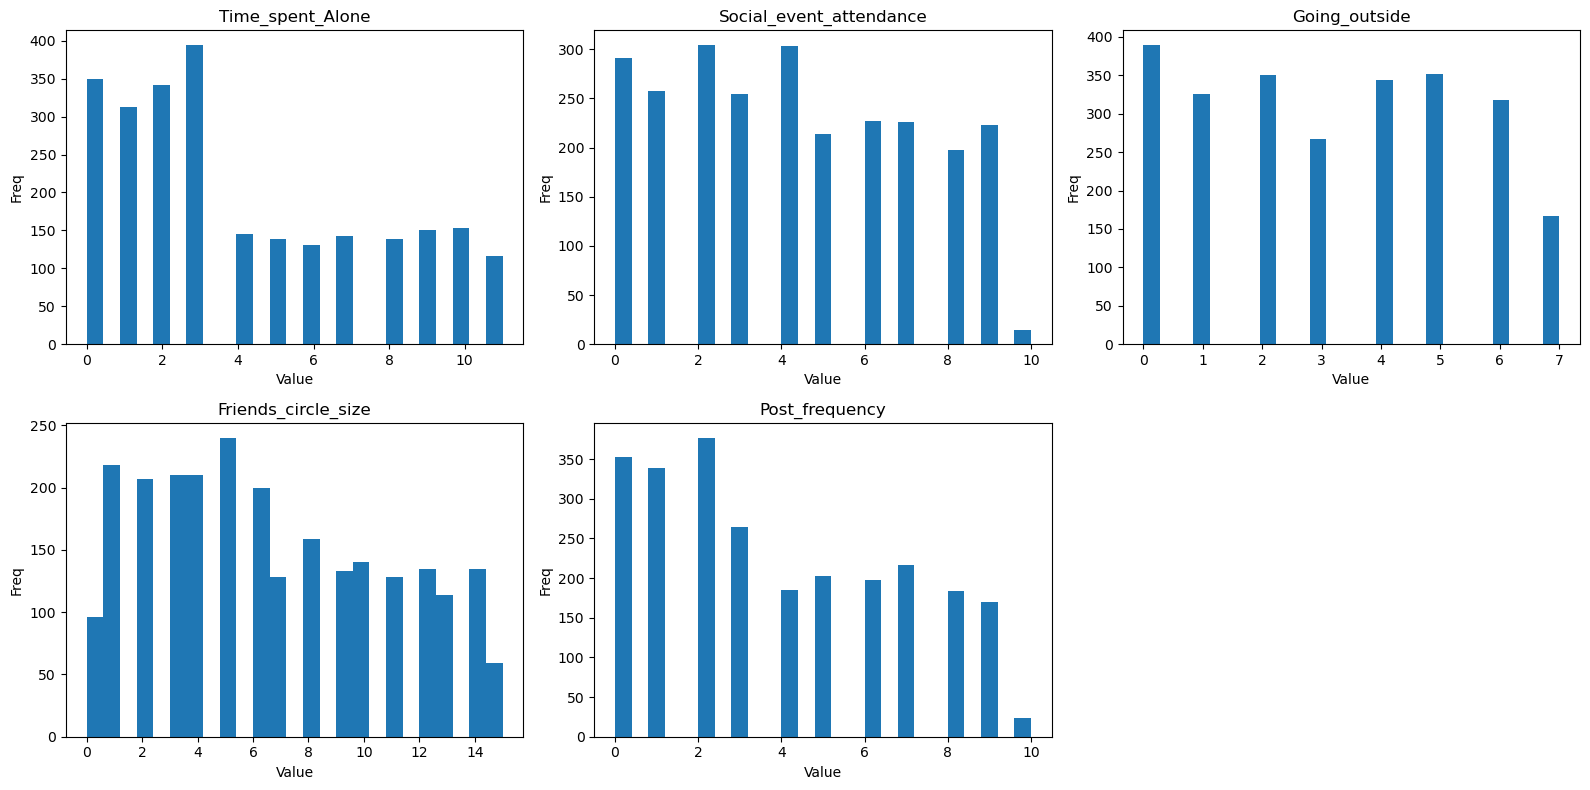

=== SKEWNESS & KURTOSIS ===
Time_spent_Alone
  Skewness : 0.562
  Kurtosis : -0.951
------------------------------
Social_event_attendance
  Skewness : 0.17
  Kurtosis : -1.151
------------------------------
Going_outside
  Skewness : 0.058
  Kurtosis : -1.228
------------------------------
Friends_circle_size
  Skewness : 0.311
  Kurtosis : -1.048
------------------------------
Post_frequency
  Skewness : 0.366
  Kurtosis : -1.12
------------------------------


In [7]:
# Skewness & Kurtosis check for numeric values
import matplotlib.pyplot as plt

numeric_features = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

plt.figure(figsize=(16, 8))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col], bins=25)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Freq")

plt.tight_layout()
plt.show()

print("=== SKEWNESS & KURTOSIS ===")
for col in numeric_features:
    print(f"{col}")
    print("  Skewness :", round(df[col].skew(), 3))
    print("  Kurtosis :", round(df[col].kurtosis(), 3))
    print("-" * 30)


In [8]:
#filling missing values (for yes/no values using KNN Imputation) and label encoding (No: 0, Yes: 1)
from sklearn.impute import KNNImputer
import pandas as pd

df2 = df.copy()

yes_no_cols = ["Drained_after_socializing", "Stage_fear"]
mapping = {"Yes": 1, "No": 0}

df2[yes_no_cols] = df2[yes_no_cols].replace(mapping)

numeric_cols = df2.select_dtypes(include=["int64", "float64"]).columns

imputer = KNNImputer(n_neighbors=5)
df2[numeric_cols] = imputer.fit_transform(df2[numeric_cols])

df[yes_no_cols] = df2[yes_no_cols]

C:\Users\berfi\AppData\Local\Temp\ipykernel_3548\2008960333.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[yes_no_cols] = df2[yes_no_cols].replace(mapping)


In [9]:
# Personality label encoding (Introvert: 0, Extrovert: 1)
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [10]:
#checking for inconsistent values
print(df["Drained_after_socializing"].unique())
print(df["Stage_fear"].unique())
print(df["Personality"].unique())
print(df["Personality"].value_counts())
print(df["Stage_fear"].value_counts())
print(df["Drained_after_socializing"].value_counts())

[0. 1.]
[0. 1.]
[1 0]
Personality
1    1417
0    1095
Name: count, dtype: int64
Stage_fear
0.0    1390
1.0    1122
Name: count, dtype: int64
Drained_after_socializing
0.0    1390
1.0    1122
Name: count, dtype: int64


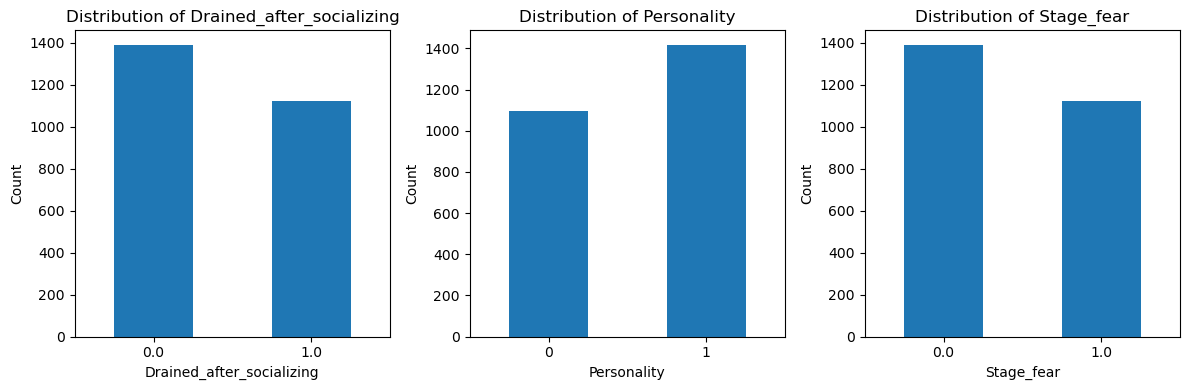

In [11]:
#Distribution of catagorical values
import matplotlib.pyplot as plt

binary_features = [
    "Drained_after_socializing",
    "Personality",
    "Stage_fear"
]

plt.figure(figsize=(12, 4))

for i, col in enumerate(binary_features, 1):
    if col in df.columns:   
        plt.subplot(1, 3, i)
        df[col].value_counts().sort_index().plot(kind="bar")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


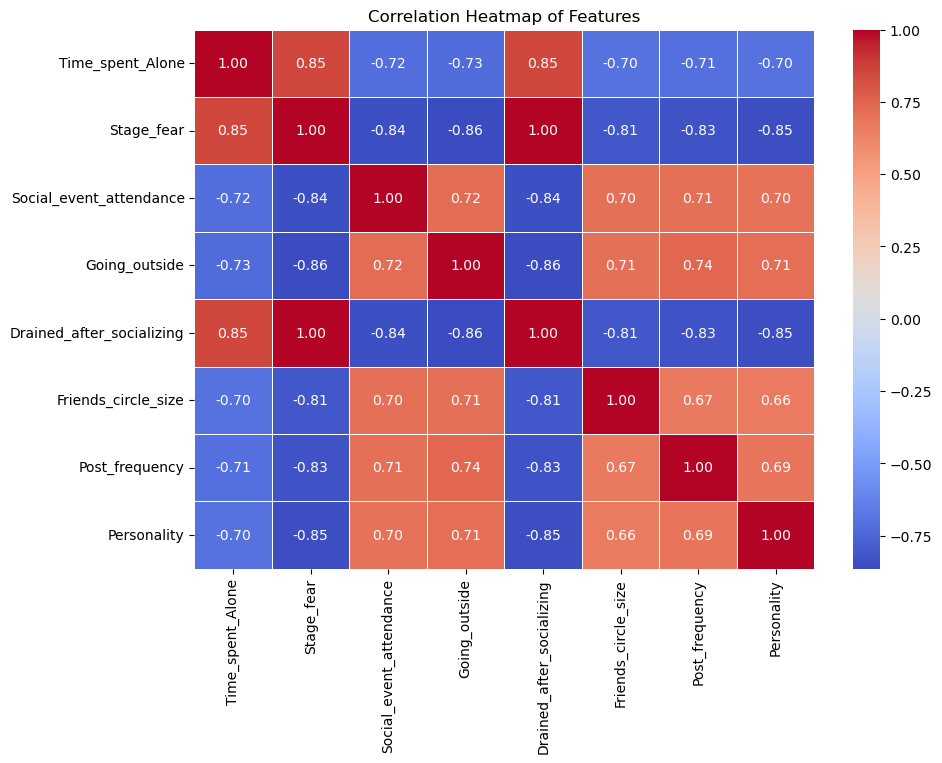

In [12]:
#Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

corr = df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Features")
plt.show()


In [13]:
# Stage_fear and Drained_after_socializing are perfectly correlated 
# Feature selection
df = df.drop(columns=["Stage_fear"])

print("Dropped feature: Stage_fear (due to perfect correlation with Drained_after_socializing)")
print("\nRemaining features:")
print(df.columns)


Dropped feature: Stage_fear (due to perfect correlation with Drained_after_socializing)

Remaining features:
Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency',
       'Personality'],
      dtype='object')


In [14]:
print(df.dtypes)

Time_spent_Alone             float64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing    float64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dtype: object


In [15]:
#normalizing numeric values
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [ ]:
# %80 TRAIN - %20 TEST (Stratified, because of mild class imbalance)
from sklearn.model_selection import train_test_split

X = df.drop("Personality", axis=1)
y = df["Personality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,     
    stratify=y,         
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape: (2009, 6)
Test shape:  (503, 6)


In [ ]:
# considered models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Linear-based 
    
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),  # Distance-based
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    
    "Decision Tree": DecisionTreeClassifier(random_state=42),  # Tree-based
    
    "SVM (RBF)": SVC(kernel="rbf", probability=True),  # Margin-based 
    
    "Naive Bayes (Gaussian)": GaussianNB()  # Probability-based
}


In [18]:
# 10-FOLD Stratified Cross Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_acc_scores = {}
cv_acc_std = {}

cv_f1_scores = {}
cv_f1_std = {}

for name, model in models.items():
    
    # Accuracy CV scores
    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    cv_acc_scores[name] = acc_scores.mean()
    cv_acc_std[name] = acc_scores.std()
    
    # F1-score CV scores
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    cv_f1_scores[name] = f1_scores.mean()
    cv_f1_std[name] = f1_scores.std()

# Create results table
cv_results_table = pd.DataFrame({
    "Model": list(cv_acc_scores.keys()),
    "Mean CV Accuracy": list(cv_acc_scores.values()),
    "Std Accuracy": list(cv_acc_std.values()),
    "Mean CV F1-Score": list(cv_f1_scores.values()),
    "Std F1-Score": list(cv_f1_std.values())
})

print("\n=== 10-FOLD STRATIFIED CROSS-VALIDATION RESULTS TABLE (ACCURACY & F1) ===")
display(cv_results_table)




=== 10-FOLD STRATIFIED CROSS-VALIDATION RESULTS TABLE (ACCURACY & F1) ===


,Model,Mean CV Accuracy,Std Accuracy,Mean CV F1-Score,Std F1-Score
0,Logistic Regression,0.929811,0.016740,0.936586,0.015373
1,KNN (k=3),0.919358,0.019392,0.927368,0.018127
2,KNN (k=5),0.922846,0.015935,0.930536,0.014743
3,KNN (k=7),0.926826,0.018503,0.934036,0.016789
4,Decision Tree,0.858127,0.017091,0.872723,0.016555
5,SVM (RBF),0.929811,0.016740,0.936586,0.015373
6,Naive Bayes (Gaussian),0.929811,0.016740,0.936586,0.015373


In [19]:
#Best model is Logistic Regression (cv accuracy 0.930)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_model = LogisticRegression(max_iter=1000)

# retrain on %80 train
best_model.fit(X_train, y_train)

# predict on %20 test
y_test_pred = best_model.predict(X_test)

# final accuracy
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Final Test Accuracy: {test_acc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))



Final Test Accuracy: 0.917

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       219
           1       0.91      0.94      0.93       284

    accuracy                           0.92       503
   macro avg       0.92      0.91      0.91       503
weighted avg       0.92      0.92      0.92       503

Confusion Matrix:
[[193  26]
 [ 16 268]]


ROC AUC Score: 0.954


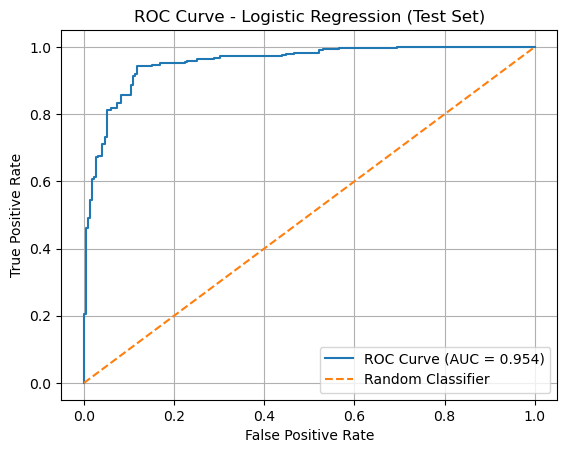

In [20]:
#ROC curve and AUC Score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_test_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

auc_score = roc_auc_score(y_test, y_test_prob)

print(f"ROC AUC Score: {auc_score:.3f}")

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Test Set)")
plt.legend()
plt.grid(True)
plt.show()
